# MACHINE LEARNING PROJECT 

## HEALTH INSURANCE PREDICTION

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, confusion_matrix,roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier



#### Reading the data

In [2]:
data=pd.read_csv("train.csv")
data


,Unnamed: 0,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,27385,27386,C3,64,Owned,Individual,36,36,No,X1,14+,2.0,16,13320.0,0
1,33499,33500,C3,2955,Owned,Individual,66,66,No,X6,10,1.0,19,16152.0,0
2,7997,7998,C1,1542,Rented,Individual,24,24,No,NaN,3,1.0,16,7310.0,0
3,33032,33033,C26,772,Rented,Individual,75,75,No,X1,1,3.0,16,15792.0,0
4,30516,30517,C2,1510,Owned,Joint,59,58,Yes,X1,14+,4.0,17,23673.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5203,5204,C3,13,Owned,Joint,47,40,Yes,X5,NaN,NaN,19,27840.0,1
9996,35448,35449,C5,1477,Rented,Individual,34,34,No,NaN,6,1.0,4,10560.0,0
9997,47253,47254,C1,2357,Owned,Individual,64,64,No,X1,8,2.0,19,14716.0,0
9998,42544,42545,C1,1443,Rented,Individual,53,53,No,X5,14+,3.0,13,11664.0,0


## Drop Unnamed Column

In [3]:
data=data.drop('Unnamed: 0', axis=1)

In [4]:
data

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,27386,C3,64,Owned,Individual,36,36,No,X1,14+,2.0,16,13320.0,0
1,33500,C3,2955,Owned,Individual,66,66,No,X6,10,1.0,19,16152.0,0
2,7998,C1,1542,Rented,Individual,24,24,No,NaN,3,1.0,16,7310.0,0
3,33033,C26,772,Rented,Individual,75,75,No,X1,1,3.0,16,15792.0,0
4,30517,C2,1510,Owned,Joint,59,58,Yes,X1,14+,4.0,17,23673.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5204,C3,13,Owned,Joint,47,40,Yes,X5,NaN,NaN,19,27840.0,1
9996,35449,C5,1477,Rented,Individual,34,34,No,NaN,6,1.0,4,10560.0,0
9997,47254,C1,2357,Owned,Individual,64,64,No,X1,8,2.0,19,14716.0,0
9998,42545,C1,1443,Rented,Individual,53,53,No,X5,14+,3.0,13,11664.0,0


In [5]:
data.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,27386,C3,64,Owned,Individual,36,36,No,X1,14+,2.0,16,13320.0,0
1,33500,C3,2955,Owned,Individual,66,66,No,X6,10,1.0,19,16152.0,0
2,7998,C1,1542,Rented,Individual,24,24,No,NaN,3,1.0,16,7310.0,0
3,33033,C26,772,Rented,Individual,75,75,No,X1,1,3.0,16,15792.0,0
4,30517,C2,1510,Owned,Joint,59,58,Yes,X1,14+,4.0,17,23673.0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   City_Code                10000 non-null  object 
 2   Region_Code              10000 non-null  int64  
 3   Accomodation_Type        10000 non-null  object 
 4   Reco_Insurance_Type      10000 non-null  object 
 5   Upper_Age                10000 non-null  int64  
 6   Lower_Age                10000 non-null  int64  
 7   Is_Spouse                10000 non-null  object 
 8   Health Indicator         7671 non-null   object 
 9   Holding_Policy_Duration  5946 non-null   object 
 10  Holding_Policy_Type      5946 non-null   float64
 11  Reco_Policy_Cat          10000 non-null  int64  
 12  Reco_Policy_Premium      10000 non-null  float64
 13  Response                 10000 non-null  int64  
dtypes: float64(2), int64(6)

In [7]:
data.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,10000.000000,10000.000000,10000.000000,10000.00000,5946.000000,10000.000000,10000.000000,10000.000000
mean,25514.420300,1723.510900,44.765600,42.65650,2.431719,15.090700,14182.681460,0.245900
std,14789.327793,1416.809648,17.281705,17.31614,1.026051,6.350237,6538.837384,0.430641
min,8.000000,1.000000,18.000000,16.00000,1.000000,1.000000,2280.000000,0.000000
25%,12519.250000,517.000000,28.000000,27.00000,1.000000,12.000000,9278.400000,0.000000
50%,25512.500000,1382.000000,44.000000,40.00000,3.000000,17.000000,13214.000000,0.000000
75%,38330.750000,2637.000000,59.000000,57.00000,3.000000,20.000000,18070.000000,0.000000
max,50874.000000,6193.000000,75.000000,75.00000,4.000000,22.000000,42256.000000,1.000000


## Replacing 14+ in Holding Policy Duration

In [8]:
data['Holding_Policy_Duration']=(data['Holding_Policy_Duration'].replace(['14+'],[15])).astype(float)

## Checking Missing Values

In [9]:
data.isna().sum()

ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           2329
Holding_Policy_Duration    4054
Holding_Policy_Type        4054
Reco_Policy_Cat               0
Reco_Policy_Premium           0
Response                      0
dtype: int64

## Replacing Missing values with mode

In [10]:
data['Health Indicator'] = data['Health Indicator'].fillna(data['Health Indicator'].mode()[0])
data['Holding_Policy_Duration'] =data['Holding_Policy_Duration'].fillna(data['Holding_Policy_Duration'].mode()[0])
data['Holding_Policy_Type'] = data['Holding_Policy_Type'].fillna(data['Holding_Policy_Type'].mode()[0])

####  Converting all the Yes to 1 and No to 0. 


In [11]:
data['Accomodation_Type'] = data['Accomodation_Type'].replace({'Rented': 0, 'Owned': 1})
data['Reco_Insurance_Type'] = data['Reco_Insurance_Type'].replace({'Individual': 0, 'Joint': 1})
data['Is_Spouse'] = data['Is_Spouse'].replace({'No': 0, 'Yes': 1})
    

In [12]:
data

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,27386,C3,64,1,0,36,36,0,X1,15.0,2.0,16,13320.0,0
1,33500,C3,2955,1,0,66,66,0,X6,10.0,1.0,19,16152.0,0
2,7998,C1,1542,0,0,24,24,0,X1,3.0,1.0,16,7310.0,0
3,33033,C26,772,0,0,75,75,0,X1,1.0,3.0,16,15792.0,0
4,30517,C2,1510,1,1,59,58,1,X1,15.0,4.0,17,23673.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5204,C3,13,1,1,47,40,1,X5,15.0,3.0,19,27840.0,1
9996,35449,C5,1477,0,0,34,34,0,X1,6.0,1.0,4,10560.0,0
9997,47254,C1,2357,1,0,64,64,0,X1,8.0,2.0,19,14716.0,0
9998,42545,C1,1443,0,0,53,53,0,X5,15.0,3.0,13,11664.0,0


#### Checking Null Values again

In [13]:
data.isna().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

> We can see that there are no null values..Hence proceeding with Analysis

## Detecting Outliers

C:\Users\User\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


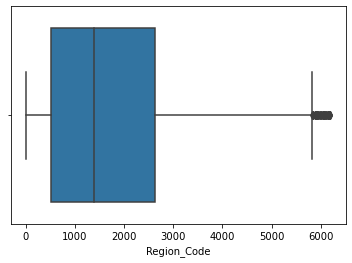

C:\Users\User\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


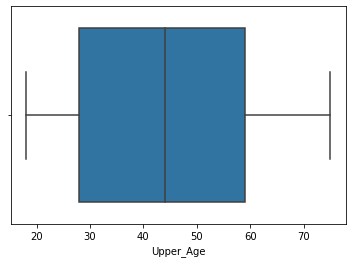

C:\Users\User\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


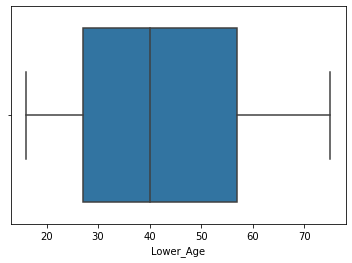

C:\Users\User\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


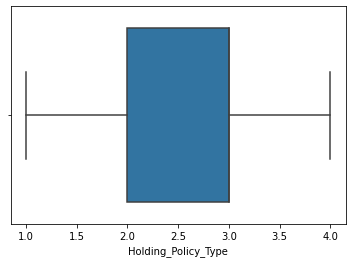

C:\Users\User\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


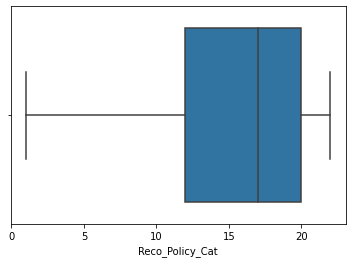

C:\Users\User\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


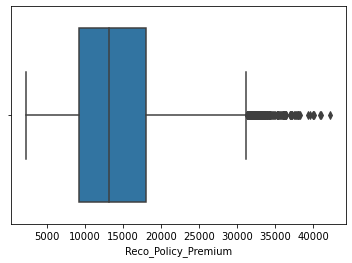

In [14]:
columns=["Region_Code","Upper_Age","Lower_Age","Holding_Policy_Type","Reco_Policy_Cat","Reco_Policy_Premium"]
for i in columns:
    sns.boxplot(x=data[i],data=data,orient='v')
    plt.show()


> ### Observation: It is observed that Reco_Policy_Premium has outliers detected

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Reco_Policy_Premium', ylabel='Density'>

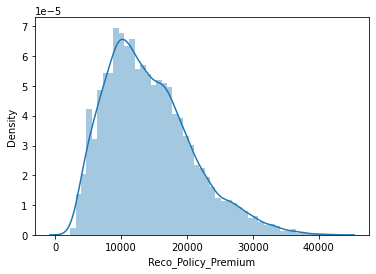

In [15]:
sns.distplot(data['Reco_Policy_Premium'])


#### Removing outlier from Reco_Policy_Premium

In [16]:
from scipy import stats        
data = data[(stats.zscore(data['Reco_Policy_Premium'])>-3) & (stats.zscore(data['Reco_Policy_Premium'])<3)]

#### Checking oulier again

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Reco_Policy_Premium', ylabel='Density'>

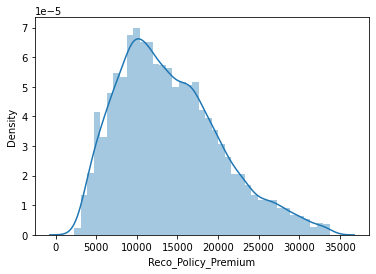

In [17]:
sns.distplot(data['Reco_Policy_Premium'])


## Exploratory Data Analytics

### City Code and Response

In [18]:
data.City_Code.describe()

count     9934
unique      36
top         C1
freq      1769
Name: City_Code, dtype: object

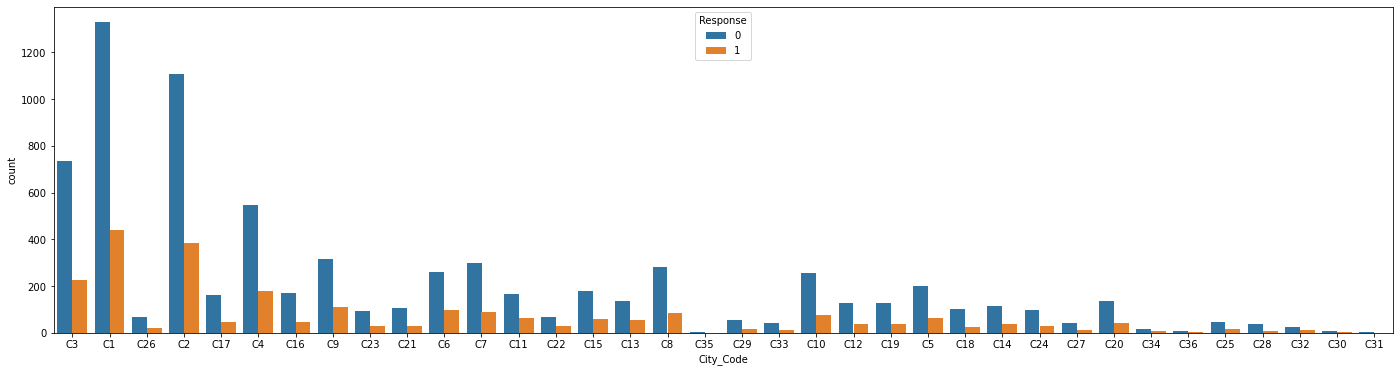

In [19]:
plt.figure(figsize=(24,6))
sns.countplot(x = 'City_Code', hue = 'Response', data = data)
plt.show()


#### Conclusion: Most of the customers are from City code C1 who have shown interest in recomended policy

## Accomodation Type

<AxesSubplot:xlabel='Accomodation_Type', ylabel='count'>

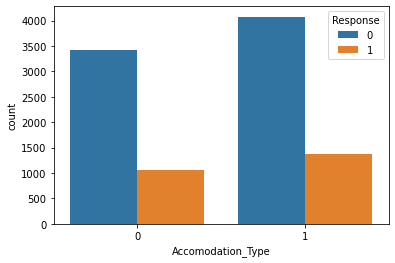

In [20]:
sns.countplot(x = 'Accomodation_Type', hue = 'Response', data = data)


#### Conclusion: Owned house customers have higher interest than rented house customers.

### Reco_Insurance_Type

<AxesSubplot:xlabel='Reco_Insurance_Type', ylabel='count'>

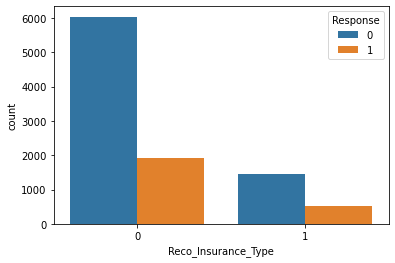

In [21]:
sns.countplot(x = 'Reco_Insurance_Type', hue = 'Response', data = data)


#### Conclusion: Individual customers have shown higher interest

### Upper_Age

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Upper_Age'>

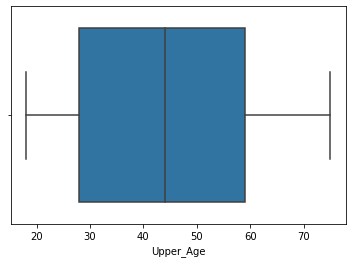

In [22]:
sns.boxplot(data['Upper_Age'])


#### Conclusion: Most of upper age group lies below the age of 70

<AxesSubplot:xlabel='Upper_Age', ylabel='count'>

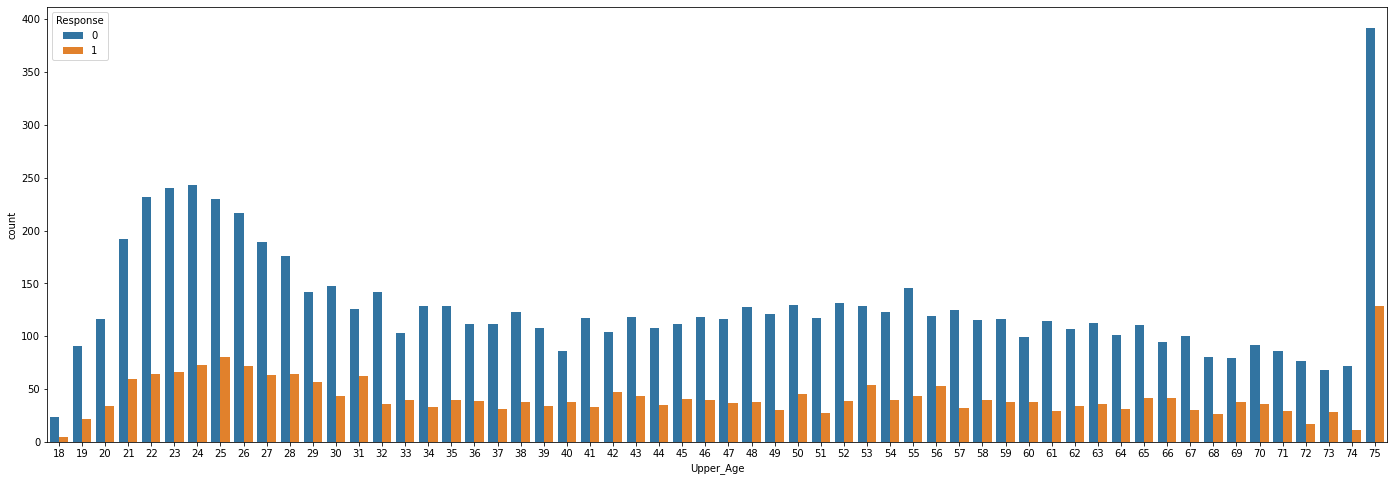

In [23]:
plt.figure(figsize = (24, 8))

sns.countplot(x = 'Upper_Age', hue = 'Response', data = data)


#### Conclusion: More that 150 people with age 75 has shown interest in policy

### Lower Age

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Lower_Age'>

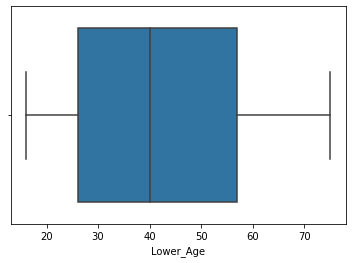

In [24]:
sns.boxplot(data['Lower_Age'])


<AxesSubplot:xlabel='Lower_Age', ylabel='count'>

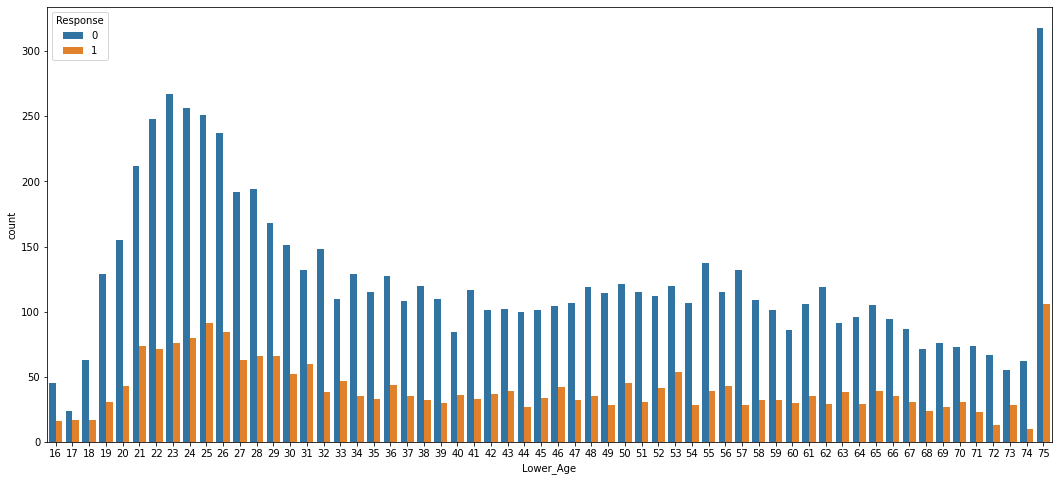

In [25]:
plt.figure(figsize = (18, 8))
sns.countplot(x = 'Lower_Age', hue = 'Response', data=data)

### Holding_Policy_Type

<AxesSubplot:xlabel='Holding_Policy_Type', ylabel='count'>

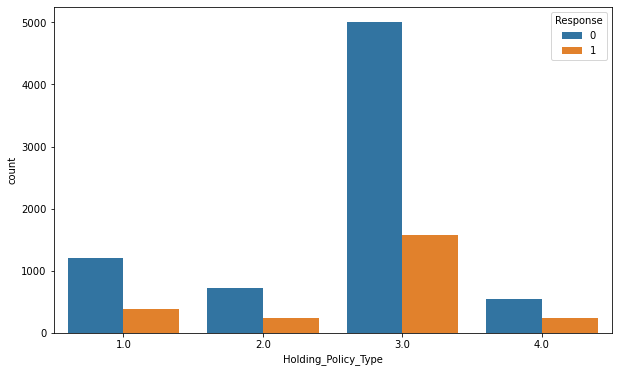

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Holding_Policy_Type', hue = 'Response', data = data)

#### Conclusion:Customers with holding policy type 3 have shown higher interest than those with other types

### Holding_Policy_Duration

<AxesSubplot:xlabel='Holding_Policy_Duration', ylabel='count'>

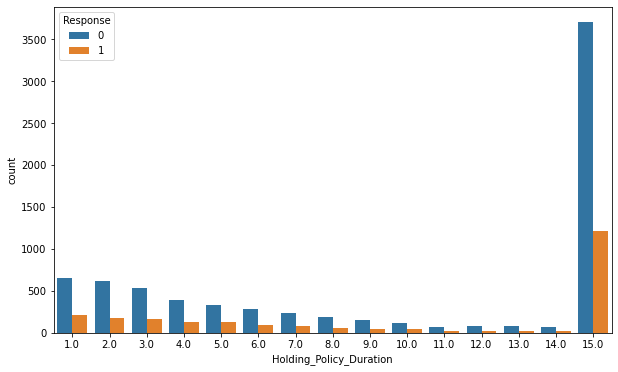

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Holding_Policy_Duration', hue = 'Response', data = data)


#### Conclusion: Customers are more interested in policies with 15 year of term

### Reco_Policy_Premium

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Reco_Policy_Premium'>

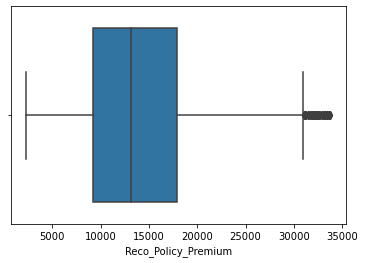

In [28]:
sns.boxplot(data['Reco_Policy_Premium'])


<AxesSubplot:xlabel='Response', ylabel='Reco_Policy_Premium'>

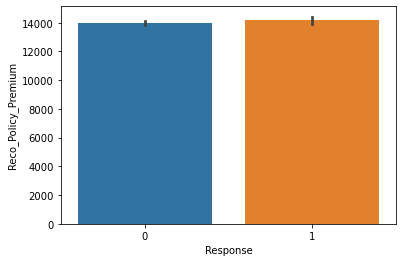

In [29]:
sns.barplot(x = 'Response', y ='Reco_Policy_Premium', data = data)


#### Observation: It is observed that customers are intersted in Premium Policy of more that 14000

### Reco_Policy_Cat

<AxesSubplot:xlabel='Reco_Policy_Cat', ylabel='count'>

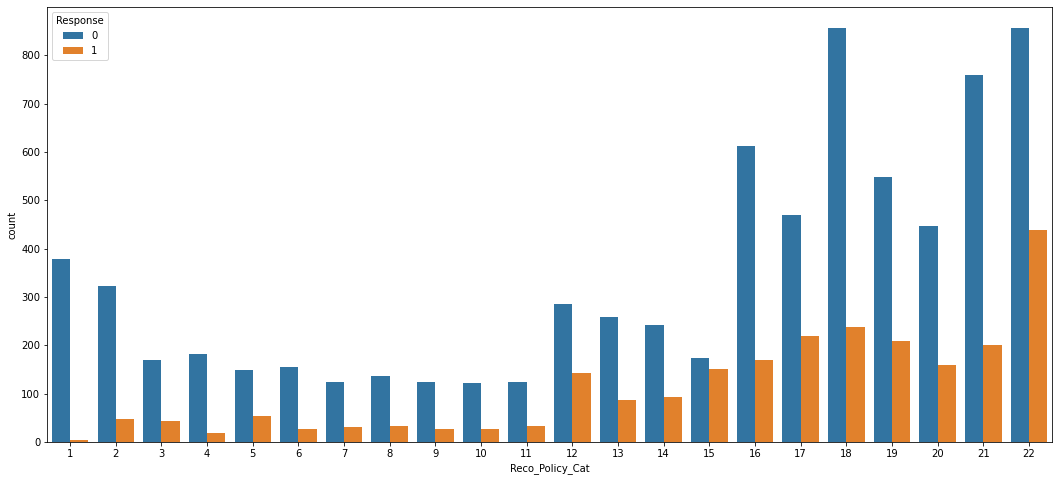

In [30]:

plt.figure(figsize = (18, 8))
sns.countplot(x = 'Reco_Policy_Cat', hue = 'Response', data=data)

#### Conclusion:Customers have shown more interest in the 22nd category of recommended policies

### Reco_Insurance_Type

<AxesSubplot:title={'center':'Response 1'}, ylabel='None'>

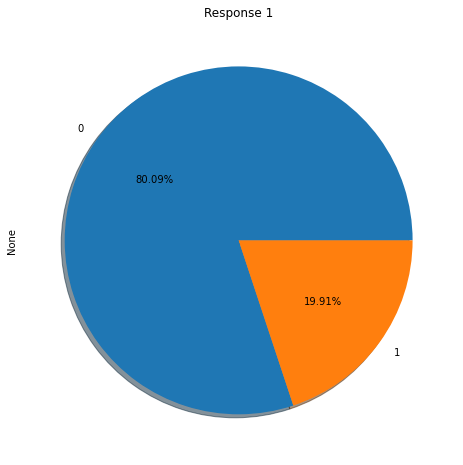

In [31]:

plt.figure(figsize=(24,8))

data.groupby('Reco_Insurance_Type').agg('size').plot.pie(shadow = True, autopct = '%1.2f%%', 
                                                          title = 'Response 1')

#### Conclusion:Almost 79% of customers prefer Individual insurance type

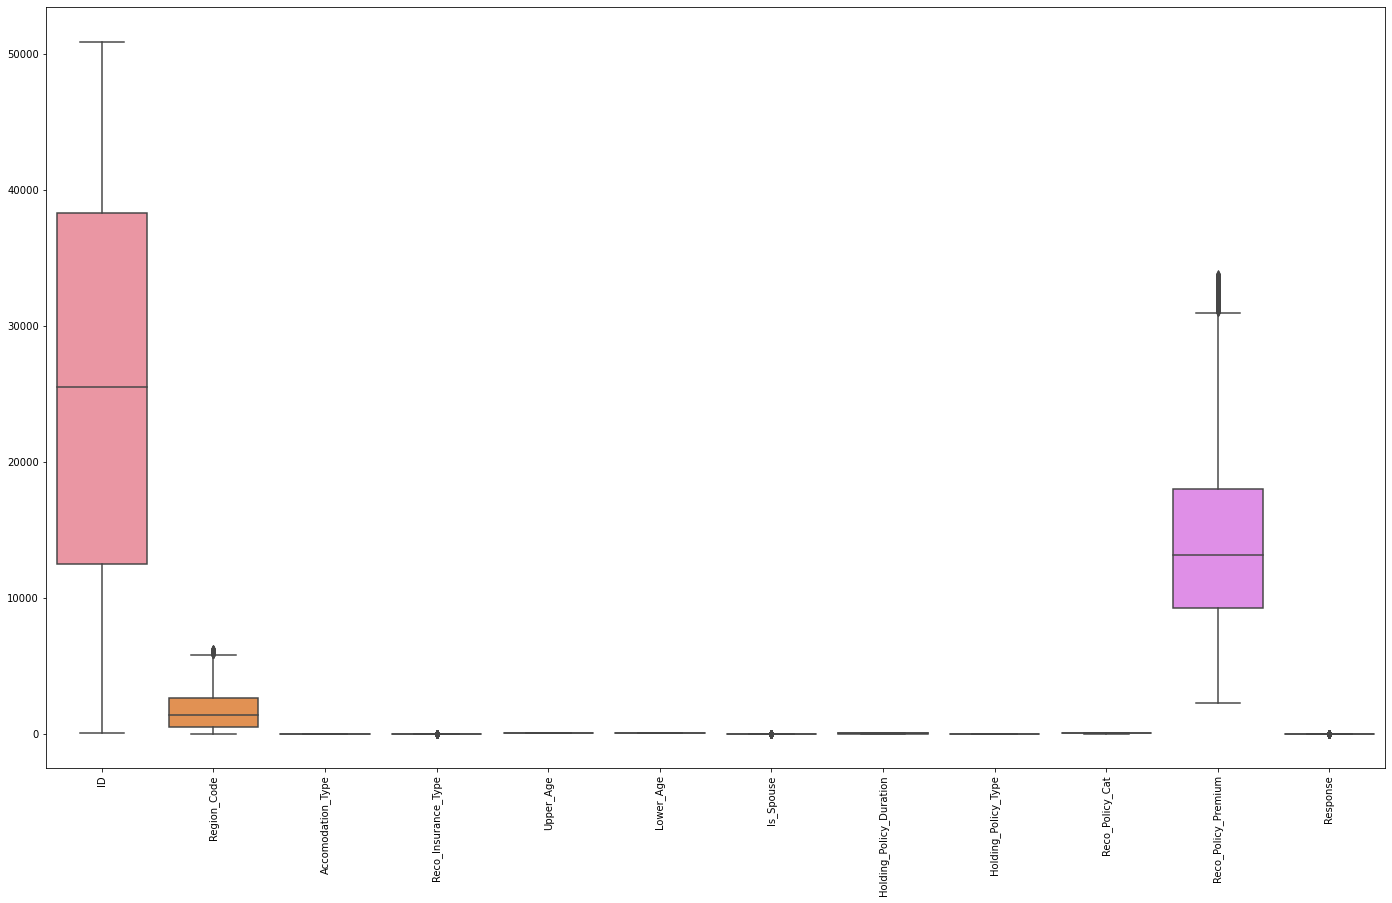

In [32]:
plt.figure(figsize=(24,14))
box = sns.boxplot(data=data)
box.set_xticklabels(labels=box.get_xticklabels(),rotation=90);

### Relationship between Age of policy holder with proposed Premium by Reco_Insurance_Type

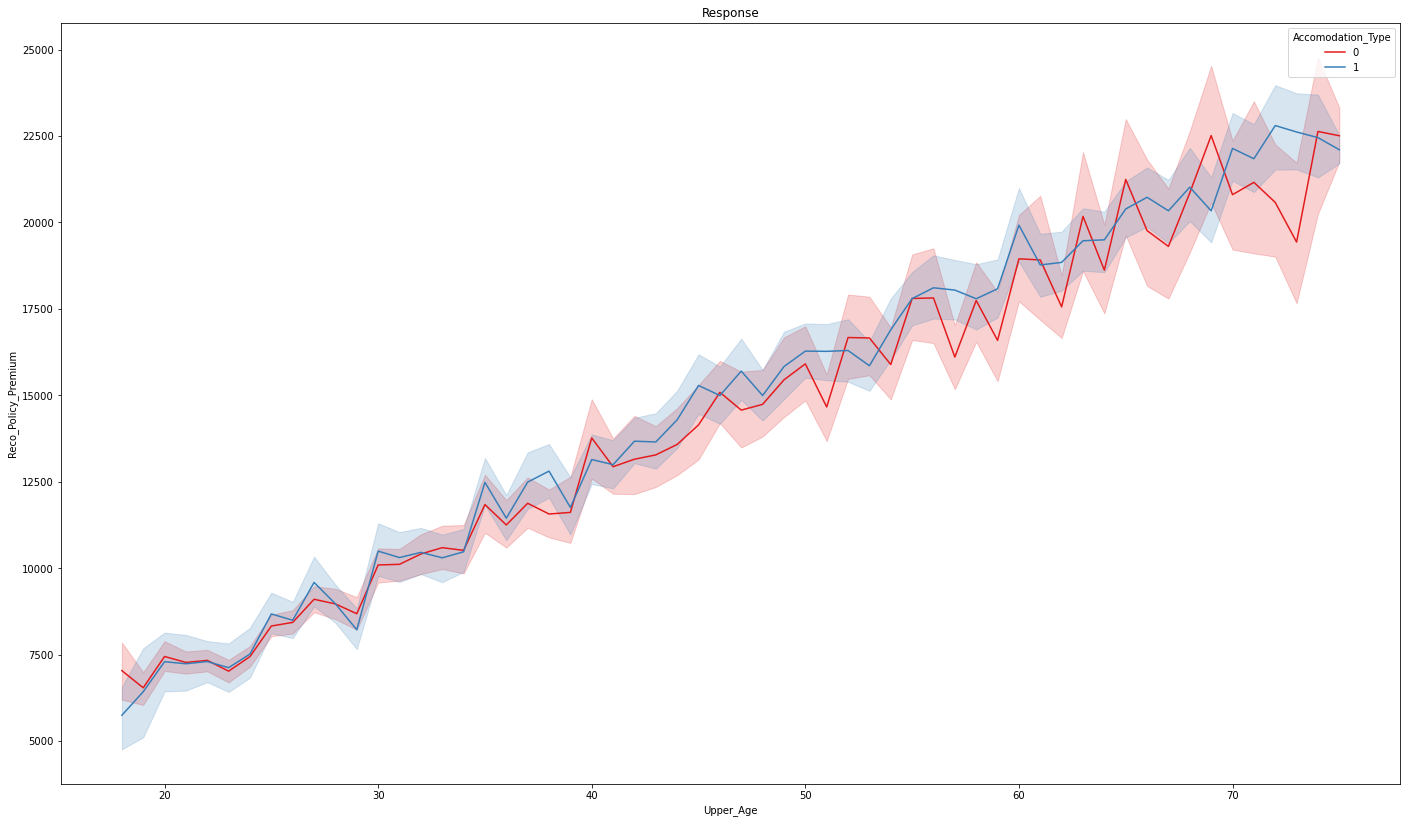

In [33]:
plt.figure(figsize=(24,14))

sns.lineplot(data = data, x = 'Upper_Age', y = 'Reco_Policy_Premium', hue = 'Accomodation_Type',
             palette = 'Set1')

plt.title('Response')
plt.show()

#### Conclusion: it is observed that premium increases as one's age increases

## Pair Plot

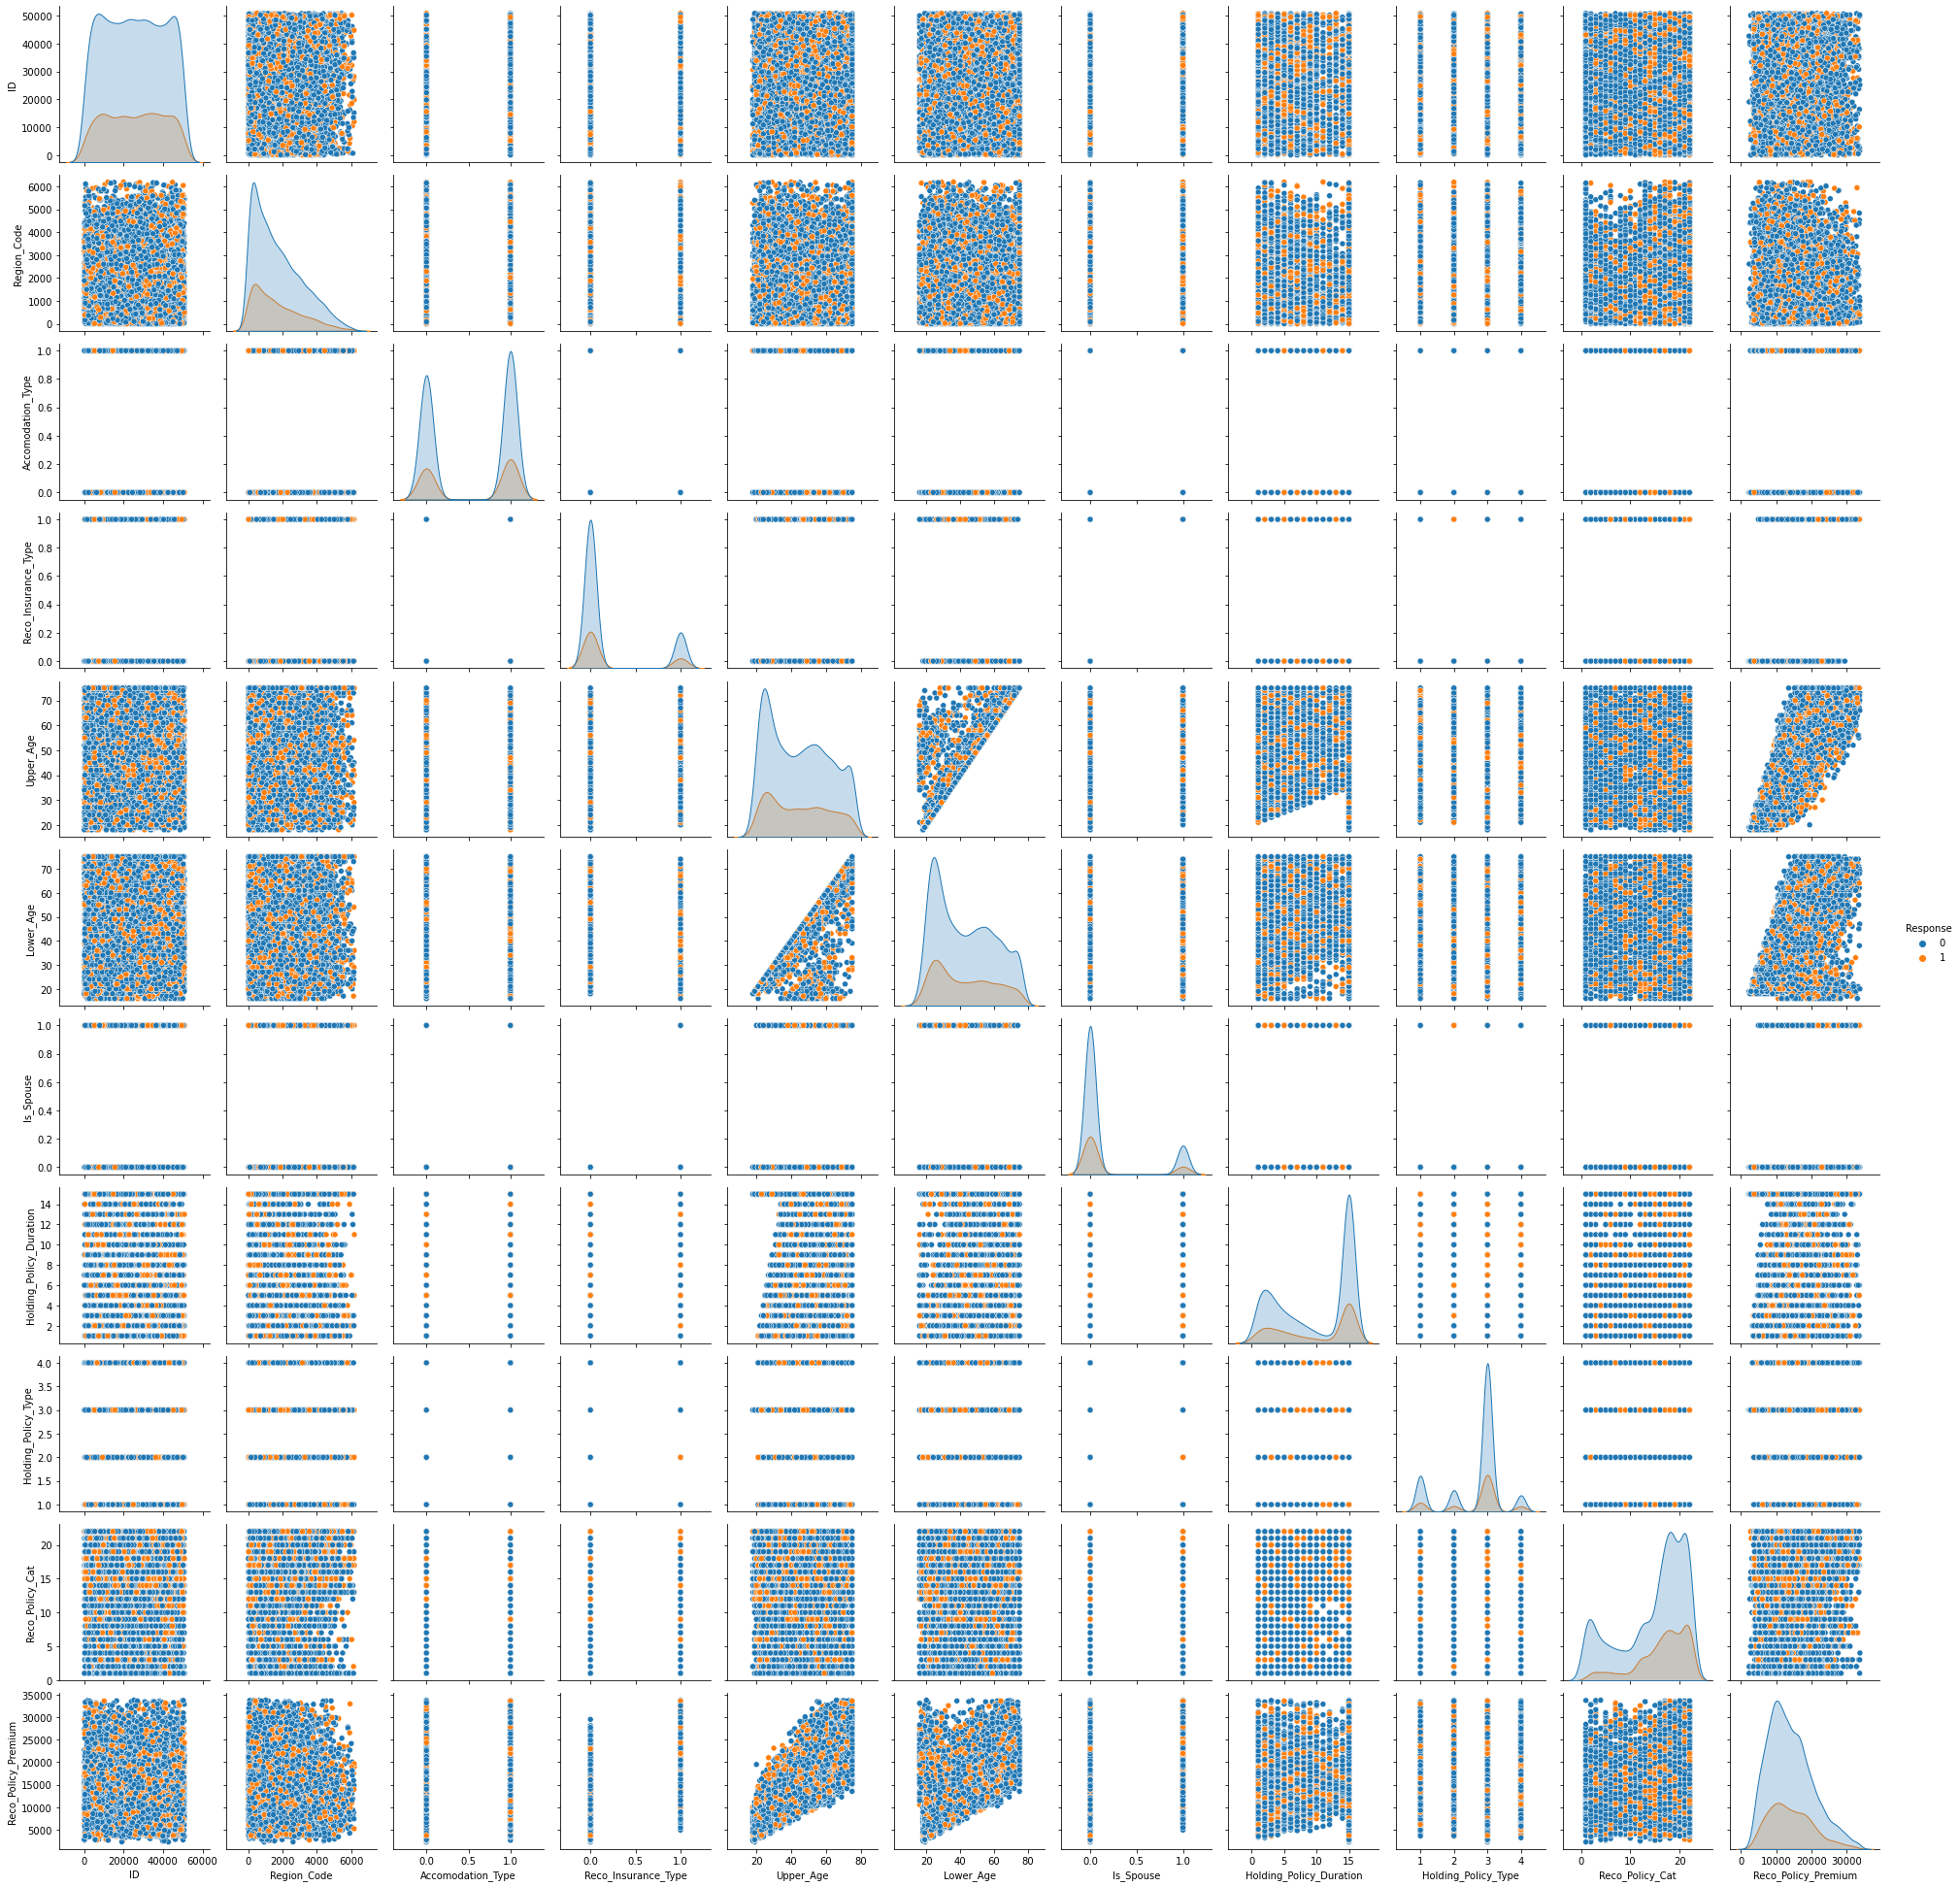

In [34]:
sns.pairplot(data,hue='Response')


## Heat Map(correlation heatmap for all features)

<AxesSubplot:>

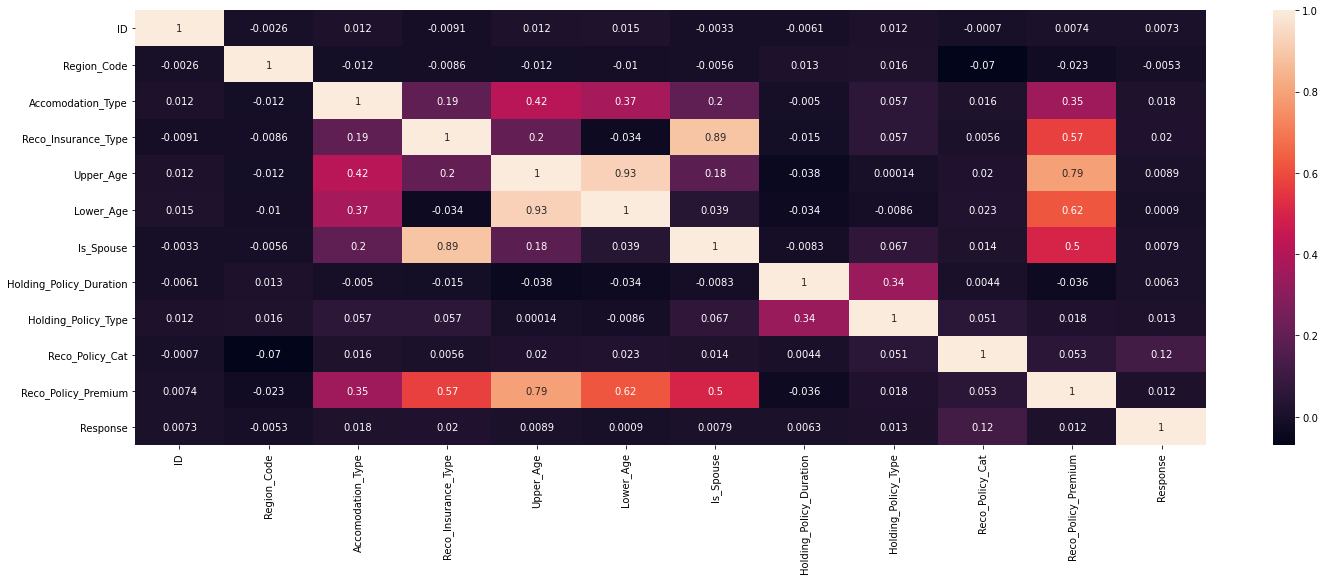

In [35]:
plt.figure(figsize = (24, 8))
sns.heatmap(data.corr(), annot = True)

## One Hot Encoding

In [36]:
for column in ['City_Code','Health Indicator','Reco_Policy_Cat']:
        dummies=pd.get_dummies(data[column],prefix=column)
        data=pd.concat([data,dummies],axis=1)
        data=data.drop(column,axis=1)

In [37]:
data['Holding_Policy_Type'] = data['Holding_Policy_Type'].astype(str)
data['Region_Code'] = data['Region_Code'].astype(str)
data['Holding_Policy_Duration'] = data['Holding_Policy_Duration'].astype(str)


## Model Building

### Splitting data into X and y

In [38]:
y=data['Response']
X=data.drop('Response',axis=1)

## Train-test Split


In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.2,shuffle=True,random_state=1)

### Feature Scaling

In [40]:
X_train

,ID,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Premium,...,Reco_Policy_Cat_13,Reco_Policy_Cat_14,Reco_Policy_Cat_15,Reco_Policy_Cat_16,Reco_Policy_Cat_17,Reco_Policy_Cat_18,Reco_Policy_Cat_19,Reco_Policy_Cat_20,Reco_Policy_Cat_21,Reco_Policy_Cat_22
1220,38906,521,0,0,26,26,0,15.0,3.0,9536.0,...,0,0,0,0,0,0,0,0,0,0
924,49297,967,0,0,42,42,0,2.0,2.0,9422.0,...,0,0,0,0,0,0,0,0,0,0
4291,36827,72,1,0,47,47,0,15.0,3.0,12258.0,...,0,0,0,0,0,0,1,0,0,0
7205,49202,1680,0,0,44,44,0,3.0,1.0,10136.0,...,0,0,0,0,0,0,1,0,0,0
242,3928,2448,0,0,25,25,0,15.0,3.0,4928.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2916,12719,1414,1,0,24,24,0,15.0,3.0,7308.0,...,0,1,0,0,0,0,0,0,0,0
7866,22568,485,1,0,24,24,0,15.0,3.0,5104.0,...,0,0,0,0,0,0,0,0,0,0
913,198,1327,1,0,75,75,0,3.0,3.0,25308.0,...,0,0,0,0,0,0,0,0,0,1
5226,23027,1823,1,1,43,20,0,15.0,3.0,16056.0,...,0,0,0,0,0,0,0,0,0,1


In [41]:
y_train.value_counts()

0    1475
1     511
Name: Response, dtype: int64

In [42]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)


## Logistic Regression


#### As dependent variable is categorical using Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
fit_lr=model.fit(X_train,y_train)

In [44]:
y_pred = model.predict(X_test)

In [45]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [46]:
y_proba = model.predict_proba(X_test)

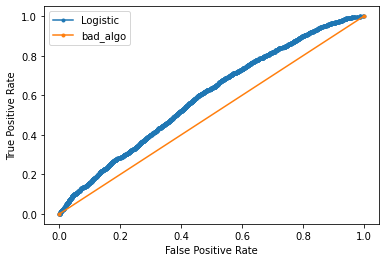

AUC is 0.5941010100871148


In [47]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)


lr_probs = y_proba[:,1]
lr_auc = roc_auc_score(y_test, lr_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.plot(ns_fpr, ns_tpr, marker='.', label='bad_algo')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print(f"AUC is {lr_auc}")

In [48]:
confusion_matrix(y_test,y_pred)

array([[5821,  193],
       [1802,  132]], dtype=int64)

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7489934574735783

In [50]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred)

0.06825232678386763

In [51]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.11686586985391766

## Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree  = DecisionTreeClassifier(criterion="gini",max_depth=5)
fit_dt=tree.fit(X_train,y_train)
fit_dt

DecisionTreeClassifier(max_depth=5)

In [53]:
y_pred = tree.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7460996477101157

In [55]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred)

0.3917525773195876

In [56]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred)

0.07859358841778696

In [57]:
y_prob_tree = tree.predict_proba(X_test)

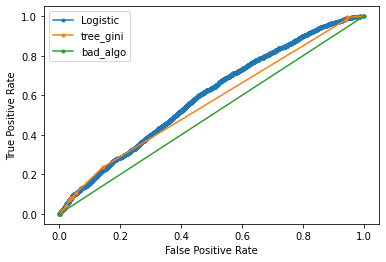

AUC is 0.5941010100871148


In [58]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)


lr_probs = y_proba[:,1]
lr_auc = roc_auc_score(y_test, lr_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

tr_probs = y_prob_tree[:,1]
tr_auc = roc_auc_score(y_test, tr_probs)
tr_fpr, tr_tpr, _ = roc_curve(y_test, tr_probs)

plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.plot(tr_fpr, tr_tpr, marker='.', label='tree_gini')
plt.plot(ns_fpr, ns_tpr, marker='.', label='bad_algo')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print(f"AUC is {lr_auc}")

## Plot tree

In [59]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree  = DecisionTreeClassifier(criterion="gini",max_depth=3)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

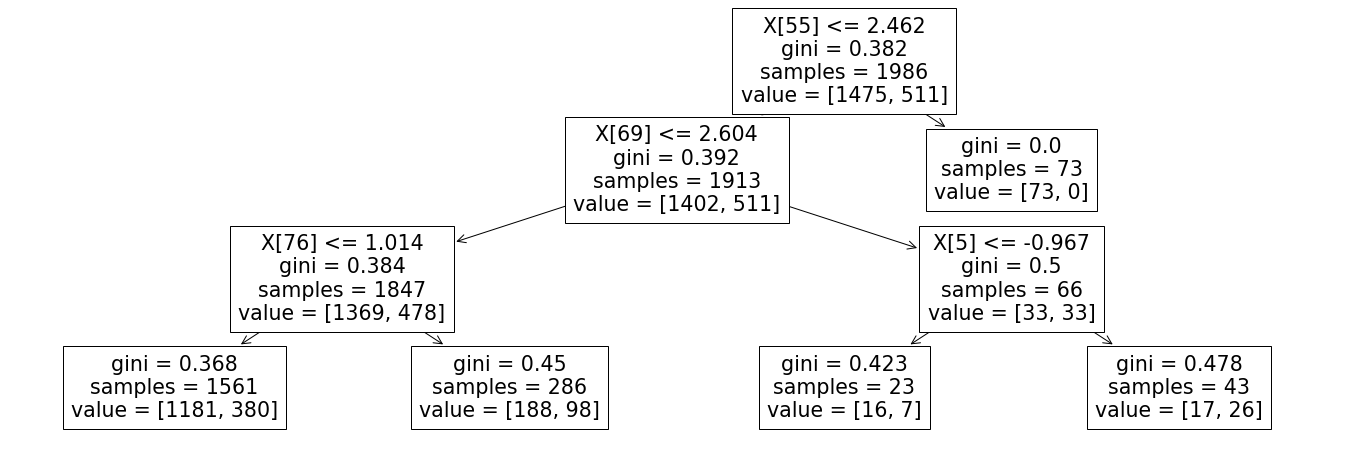

In [60]:
plt.figure(figsize=(24,8))
plot_tree(tree)
plt.show()

## Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=150,criterion="gini")
fit_rf=rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [62]:
accuracy_score(y_test,y_pred)

0.7547810770005032

In [63]:
precision_score(y_test,y_pred)

0.45098039215686275

In [64]:
recall_score(y_test,y_pred)

0.035677352637021716

In [65]:
y_prob_rf = rf.predict_proba(X_test)

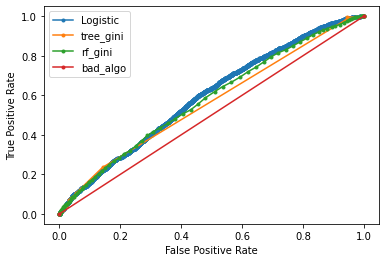

AUC is 0.5941010100871148


In [66]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)


lr_probs = y_proba[:,1]
lr_auc = roc_auc_score(y_test, lr_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

tr_probs = y_prob_tree[:,1]
tr_auc = roc_auc_score(y_test, tr_probs)
tr_fpr, tr_tpr, _ = roc_curve(y_test, tr_probs)

rf_probs = y_prob_rf[:,1]
rf_auc = roc_auc_score(y_test, rf_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)


plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.plot(tr_fpr, tr_tpr, marker='.', label='tree_gini')
plt.plot(rf_fpr, rf_tpr, marker='.', label='rf_gini')
plt.plot(ns_fpr, ns_tpr, marker='.', label='bad_algo')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print(f"AUC is {lr_auc}")

## Adaboost classifer

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


tree = DecisionTreeClassifier()
lr = LogisticRegression()


In [68]:
from sklearn.ensemble import AdaBoostClassifier

In [69]:
model_adaboost = AdaBoostClassifier(base_estimator=tree,n_estimators=100)

In [70]:
fit_ada=model_adaboost.fit(X_train,y_train)

In [71]:
y_pred = model_adaboost.predict(X_test)

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.629718168092602

In [73]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred)

0.2656758012076173

In [74]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred)

0.2957600827300931

## SVM

In [75]:
from sklearn.svm import SVC

model = SVC(C=0.5,kernel="rbf")
fit_svm=model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [76]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[6012,    2],
       [1931,    3]], dtype=int64)

In [77]:
# accuracy
print("accuracy", accuracy_score(y_test, y_pred))

# precision
print("precision", precision_score(y_test, y_pred))

# recall/sensitivity
print("recall", recall_score(y_test, y_pred))

accuracy 0.7567941620533467
precision 0.6
recall 0.0015511892450879006


## KNN

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

knn = KNeighborsClassifier(n_neighbors=5,p=2)
fit_knn=knn.fit(X_train,y_train)
y_pred  = knn.predict(X_test)
print(f"Accuracy score is {accuracy_score(y_test,y_pred)}")
print(f"Precision score is {precision_score(y_test,y_pred)}")
print(f"Recall score is {recall_score(y_test,y_pred)}")
print(f"misclassification error { sum((y_pred != y_test))/ X_test.shape[0]}")

Accuracy score is 0.7157775541016608
Precision score is 0.33766233766233766
Recall score is 0.17476732161323683
misclassification error 0.2842224458983392


## Models Accuracy

In [79]:
###  LogisticRegression
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
Logistic_Regression = ("Accuracy of Model using LogisticRegression  :",accuracy_score(y_test, y_pred))
print(Logistic_Regression)

### KNN
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
KNN = ("Accuracy of Model using KNN:",accuracy_score(y_test, y_pred))
print(KNN)

### SVM
svc_lin = SVC(kernel = 'linear', random_state = 0)
svc_lin.fit(X_train, y_train)
y_pred = svc_lin.predict(X_test)
SVM = ("Accuracy of Model using SVM:",(accuracy_score(y_test, y_pred)))
print(SVM)

### Gaussian
gauss = GaussianNB()
gauss.fit(X_train, y_train)
y_pred = gauss.predict(X_test)
GNB = ("Accuracy of Model using Gaussian:",accuracy_score(y_test, y_pred))
print(GNB)

### Decision_Tree
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
Decision_Tree = ("Accuracy of Model using Decision_Tree:",accuracy_score(y_test, y_pred))
print(Decision_Tree)


### Random_Forest
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
Random_Forest = ("Accuracy of Model using Random_Forest:",accuracy_score(y_test, y_pred))
print(Random_Forest)

### Bagging_Classifier
bagging = BaggingClassifier(n_estimators=100, max_features=10, max_samples=100, random_state=1, n_jobs=5)
bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)
Bagging_Classifier = ("Accuracy of Model using Bagging_Classifier :",accuracy_score(y_test, y_pred))
print(Bagging_Classifier)

### Adaboost_Classifier
adaboost_model = AdaBoostClassifier(random_state=1)
adaboost_model.fit(X_train, y_train)
y_pred = adaboost_model.predict(X_test)
Adaboost_Classifier = ("Accuracy of Model using Adaboost_Classifier:",accuracy_score(y_test, y_pred))
print(Adaboost_Classifier)


### Gradient_Boosting
gradient_boosting = GradientBoostingClassifier(loss='deviance', random_state=2, verbose=0,
                                    n_estimators=50, max_depth=7,
                                    min_samples_leaf=1, min_samples_split=8)
gradient_boosting.fit(X_train, y_train)
y_pred = gradient_boosting.predict(X_test)
Gradient_Boosting = ("Accuracy of Model using Gradient_Boosting :",accuracy_score(y_test, y_pred))
print(Gradient_Boosting)

('Accuracy of Model using LogisticRegression  :', 0.7489934574735783)
('Accuracy of Model using KNN:', 0.7157775541016608)
('Accuracy of Model using SVM:', 0.7541519879214896)
('Accuracy of Model using Gaussian:', 0.29466532460996475)
('Accuracy of Model using Decision_Tree:', 0.6318570709612481)
('Accuracy of Model using Random_Forest:', 0.7365374937091093)
('Accuracy of Model using Bagging_Classifier :', 0.756668344237544)
('Accuracy of Model using Adaboost_Classifier:', 0.7477352793155511)
('Accuracy of Model using Gradient_Boosting :', 0.7425767488676397)


# Conclusion: 
> ### It is observed that 'SVM Classifier' has the best accuracy score. So using this model